In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from pandas import Timestamp
import networkx as nx 
from odmatrix import ODMatrix 

In [2]:
year = '2016' #change if needed
csv_folder = '../csv/'+year

## Prova con Dbscan1

In [3]:
# leggo il csv
df_dbscan = pd.read_csv(csv_folder+'/df_dbscan1.csv')
# elimino colonna inutile
df_dbscan.drop(['Unnamed: 0'], axis='columns', inplace=True)
# converto Created_At in datetime
df_dbscan['Created_At'] = pd.to_datetime(df_dbscan['Created_At'])
# ordino i valori per data
df_dbscan = df_dbscan.sort_values(by=['Created_At'])

df_dbscan

,Screen_name,UserID,TweetID,Coords,Lat,Lon,Created_At,Text,Labels
169,kiaruzza,16315538,779002375612796928,"[43.7167, 10.3833]",43.716700,10.383300,2016-09-22 17:00:14+00:00,Stacco la spina.\n.\n.\n.#corona #beer #salt #...,0
649,liviofotografie,376767411,779011990358556672,"[43.71266, 10.39692]",43.712660,10.396920,2016-09-22 17:38:26+00:00,"Doppio anniversario per Filippo e Valentina, c...",11
513,recasensroger,2789960074,779013476882657280,"[43.7167, 10.3833]",43.716700,10.383300,2016-09-22 17:44:20+00:00,Torre de Pisa🇮🇹 #Canon #Pisa #torredepisa #pi...,0
381,djstephfloss,16136553,779021131378548741,"[43.72263, 10.3948]",43.722630,10.394800,2016-09-22 18:14:45+00:00,"In honor of the first day of Fall, let's not f...",1
75,curropar,10651072,779022459802685440,"[43.7229514, 10.39497213]",43.722951,10.394972,2016-09-22 18:20:02+00:00,"I'm at Tower of Pisa in Pisa, PI https://t.co/...",1
...,...,...,...,...,...,...,...,...,...
14,Mattar79,67786279,783022414187880449,"[43.72040817, 10.39710583]",43.720408,10.397106,2016-10-03 19:14:26+00:00,Seguimos el periplo por este país (@ Pisa in P...,1
234,LaScalettaPisa,2327332688,783023774195077120,"[43.72725, 10.38945]",43.727250,10.389450,2016-10-03 19:19:50+00:00,Astici per una magnifica serata. Il segreto? U...,8
235,LaScalettaPisa,2327332688,783024417005645824,"[43.72725, 10.38945]",43.727250,10.389450,2016-10-03 19:22:23+00:00,Questa sera per un meeting importantissimo di ...,8
162,_miReyaRedondo,239979352,783038120497389568,"[43.72305556, 10.39641667]",43.723056,10.396417,2016-10-03 20:16:50+00:00,|• BELLA ITALIA •| 🇮🇹❣\n\n#pisa #italy #Murien...,1


In [4]:
#MAIN

# raggruppo il df in base agli utenti
Users = df_dbscan.groupby(['Screen_name'])

# memorizzo i clusters in una lista
clusters = df_dbscan['Labels'].unique().tolist()
clusters.sort()
clusters.insert(0, None)

odmatrix = ODMatrix(clusters, Users)

# creo la matrice
matrix_dbscan = odmatrix.create_matrix(clusters)

pairing_users = odmatrix.get_pairing_users(Users)

# ottengo la lista degli utenti che compiono spostamenti 
moving_users = odmatrix.get_moving_users(pairing_users)
print("In questo dataframe ci sono", len(moving_users), "utenti che compiono spostamenti.\n")

# aggiorno la matrice quando c'è uno spostamento
for user in moving_users:
    odmatrix.update_matrix(matrix_dbscan, user)
    
print("Matrice finale da DBSCAN1:\n")
print(matrix_dbscan)

In questo dataframe ci sono 24 utenti che compiono spostamenti.

Matrice finale da DBSCAN1:

[[nan -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
 [-1.  2.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  2.  4.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  3.  3.  7.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  3.  2.  2.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  1.  2.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 5.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 6.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 7.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 9.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.]
 [11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


Analizza gli spostamenti più frequenti (visualizza i clusters sulla mappa?)

### Visualizzo con i grafi

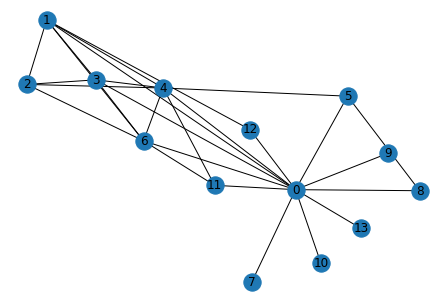

In [5]:
G = nx.from_numpy_matrix(np.array(matrix_dbscan))  
nx.draw(G, with_labels=True) 

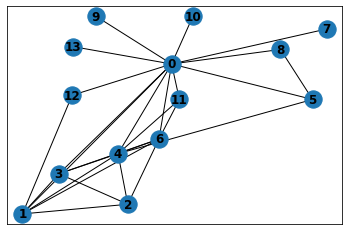

In [6]:
nx.draw_networkx(G, with_labels=True, font_weight='bold')

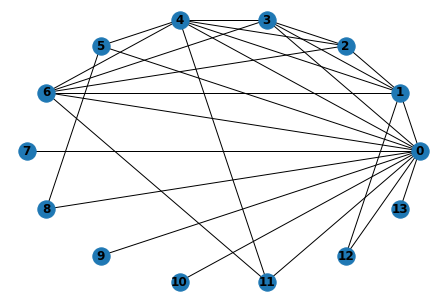

In [7]:
nx.draw_circular(G, with_labels=True, font_weight='bold')

In [8]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13))

## Prova con Dbscan2

In [9]:
# leggo il csv
df_dbscan2 = pd.read_csv(csv_folder+'/df_dbscan2.csv')
# elimino colonna inutile
df_dbscan2.drop(['Unnamed: 0'], axis='columns', inplace=True)
# converto Created_At in datetime
df_dbscan2['Created_At'] = pd.to_datetime(df_dbscan2['Created_At'])
# ordino i valori per data
df_dbscan2 = df_dbscan2.sort_values(by=['Created_At'])

df_dbscan2

,Screen_name,UserID,TweetID,Coords,Lat,Lon,Created_At,Text,Labels
169,kiaruzza,16315538,779002375612796928,"[43.7167, 10.3833]",43.716700,10.383300,2016-09-22 17:00:14+00:00,Stacco la spina.\n.\n.\n.#corona #beer #salt #...,1
649,liviofotografie,376767411,779011990358556672,"[43.71266, 10.39692]",43.712660,10.396920,2016-09-22 17:38:26+00:00,"Doppio anniversario per Filippo e Valentina, c...",25
513,recasensroger,2789960074,779013476882657280,"[43.7167, 10.3833]",43.716700,10.383300,2016-09-22 17:44:20+00:00,Torre de Pisa🇮🇹 #Canon #Pisa #torredepisa #pi...,1
381,djstephfloss,16136553,779021131378548741,"[43.72263, 10.3948]",43.722630,10.394800,2016-09-22 18:14:45+00:00,"In honor of the first day of Fall, let's not f...",3
75,curropar,10651072,779022459802685440,"[43.7229514, 10.39497213]",43.722951,10.394972,2016-09-22 18:20:02+00:00,"I'm at Tower of Pisa in Pisa, PI https://t.co/...",3
...,...,...,...,...,...,...,...,...,...
14,Mattar79,67786279,783022414187880449,"[43.72040817, 10.39710583]",43.720408,10.397106,2016-10-03 19:14:26+00:00,Seguimos el periplo por este país (@ Pisa in P...,3
234,LaScalettaPisa,2327332688,783023774195077120,"[43.72725, 10.38945]",43.727250,10.389450,2016-10-03 19:19:50+00:00,Astici per una magnifica serata. Il segreto? U...,16
235,LaScalettaPisa,2327332688,783024417005645824,"[43.72725, 10.38945]",43.727250,10.389450,2016-10-03 19:22:23+00:00,Questa sera per un meeting importantissimo di ...,16
162,_miReyaRedondo,239979352,783038120497389568,"[43.72305556, 10.39641667]",43.723056,10.396417,2016-10-03 20:16:50+00:00,|• BELLA ITALIA •| 🇮🇹❣\n\n#pisa #italy #Murien...,3


In [10]:
#MAIN

# raggruppo il df in base agli utenti
Users = df_dbscan2.groupby(['Screen_name'])

# memorizzo i clusters in una lista
clusters = df_dbscan2['Labels'].unique().tolist()
clusters.sort()
clusters.insert(0, None)

odmatrix = ODMatrix(clusters, Users)

# creo la matrice
matrix_dbscan2 = odmatrix.create_matrix(clusters)

pairing_users = odmatrix.get_pairing_users(Users)

# ottengo la lista degli utenti che compiono spostamenti 
moving_users = odmatrix.get_moving_users(pairing_users)
print("In questo dataframe ci sono", len(moving_users), "utenti che compiono spostamenti.\n")

# aggiorno la matrice quando c'è uno spostamento
for user in moving_users:
    odmatrix.update_matrix(matrix_dbscan2, user)
    
print("Matrice finale da DBSCAN2:\n")
print(matrix_dbscan2)

In questo dataframe ci sono 24 utenti che compiono spostamenti.

Matrice finale da DBSCAN2:

[[nan -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.
  16. 17. 18. 19. 20. 21. 22. 23. 24. 25.]
 [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  4.  0.  2.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  1.  0.  3.  0.  7.  0.  0.  0.  3.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  2.  0.  2.  1.  2.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0. 

### Visualizzo con i grafi

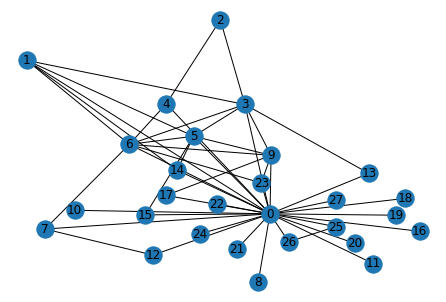

In [12]:
G3 = nx.from_numpy_matrix(np.array(matrix_dbscan2))  
nx.draw(G3, with_labels=True) 

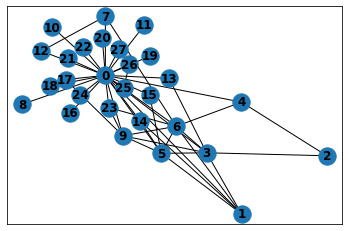

In [13]:
nx.draw_networkx(G3, with_labels=True, font_weight='bold')

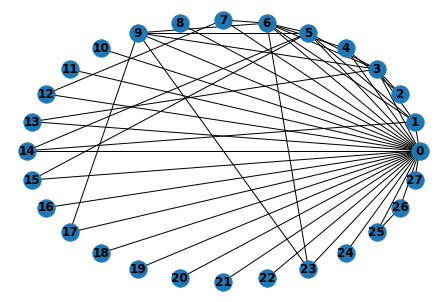

In [14]:
nx.draw_circular(G3, with_labels=True, font_weight='bold')

## Prova con Optics2

In [15]:
# leggo il csv
df_optics2 = pd.read_csv(csv_folder+'/df_optics2.csv')
# elimino colonna inutile
df_optics2.drop(['Unnamed: 0'], axis='columns', inplace=True)
# converto Created_At in datetime
df_optics2['Created_At'] = pd.to_datetime(df_optics2['Created_At'])
# ordino i valori per data
df_optics2 = df_optics2.sort_values(by=['Created_At'])

df_optics2

,Screen_name,UserID,TweetID,Coords,Lat,Lon,Created_At,Text,Labels
169,kiaruzza,16315538,779002375612796928,"[43.7167, 10.3833]",43.716700,10.383300,2016-09-22 17:00:14+00:00,Stacco la spina.\n.\n.\n.#corona #beer #salt #...,38
649,liviofotografie,376767411,779011990358556672,"[43.71266, 10.39692]",43.712660,10.396920,2016-09-22 17:38:26+00:00,"Doppio anniversario per Filippo e Valentina, c...",31
513,recasensroger,2789960074,779013476882657280,"[43.7167, 10.3833]",43.716700,10.383300,2016-09-22 17:44:20+00:00,Torre de Pisa🇮🇹 #Canon #Pisa #torredepisa #pi...,38
381,djstephfloss,16136553,779021131378548741,"[43.72263, 10.3948]",43.722630,10.394800,2016-09-22 18:14:45+00:00,"In honor of the first day of Fall, let's not f...",8
75,curropar,10651072,779022459802685440,"[43.7229514, 10.39497213]",43.722951,10.394972,2016-09-22 18:20:02+00:00,"I'm at Tower of Pisa in Pisa, PI https://t.co/...",10
...,...,...,...,...,...,...,...,...,...
14,Mattar79,67786279,783022414187880449,"[43.72040817, 10.39710583]",43.720408,10.397106,2016-10-03 19:14:26+00:00,Seguimos el periplo por este país (@ Pisa in P...,14
234,LaScalettaPisa,2327332688,783023774195077120,"[43.72725, 10.38945]",43.727250,10.389450,2016-10-03 19:19:50+00:00,Astici per una magnifica serata. Il segreto? U...,36
235,LaScalettaPisa,2327332688,783024417005645824,"[43.72725, 10.38945]",43.727250,10.389450,2016-10-03 19:22:23+00:00,Questa sera per un meeting importantissimo di ...,36
162,_miReyaRedondo,239979352,783038120497389568,"[43.72305556, 10.39641667]",43.723056,10.396417,2016-10-03 20:16:50+00:00,|• BELLA ITALIA •| 🇮🇹❣\n\n#pisa #italy #Murien...,3


In [16]:
#MAIN

# raggruppo il df in base agli utenti
Users = df_optics2.groupby(['Screen_name'])

# memorizzo i clusters in una lista
clusters = df_optics2['Labels'].unique().tolist()
clusters.sort()
clusters.insert(0, None)

odmatrix = ODMatrix(clusters, Users)

# creo la matrice
matrix_optics2 = odmatrix.create_matrix(clusters)

pairing_users = odmatrix.get_pairing_users(Users)

# ottengo la lista degli utenti che compiono spostamenti 
moving_users = odmatrix.get_moving_users(pairing_users)
print("In questo dataframe ci sono", len(moving_users), "utenti che compiono spostamenti.\n")

# aggiorno la matrice quando c'è uno spostamento
for user in moving_users:
    odmatrix.update_matrix(matrix_optics2, user)
    
print("Matrice finale da OPTICS2:\n")
print(matrix_optics2)

In questo dataframe ci sono 36 utenti che compiono spostamenti.

Matrice finale da OPTICS2:

[[nan -1.  0. ... 43. 44. 45.]
 [-1.  1.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]
 ...
 [43.  0.  0. ...  0.  0.  0.]
 [44.  0.  0. ...  1.  0.  0.]
 [45.  0.  0. ...  0.  0.  0.]]


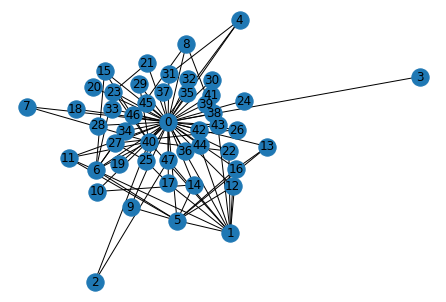

In [17]:
G3 = nx.from_numpy_matrix(np.array(matrix_optics2))  
nx.draw(G3, with_labels=True) 

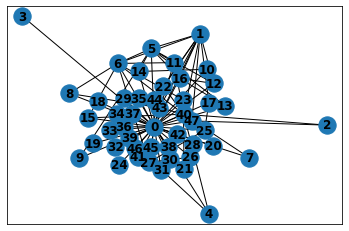

In [18]:
nx.draw_networkx(G3, with_labels=True, font_weight='bold')

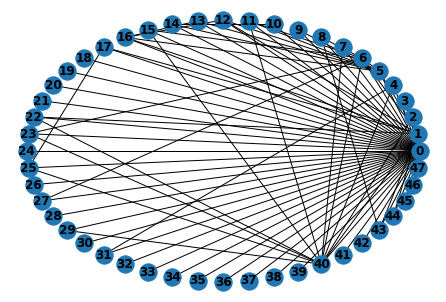

In [19]:
nx.draw_circular(G3, with_labels=True, font_weight='bold')

## Prova con Bisecting-Kmeans

In [20]:
# leggo il csv
df_bkmeans = pd.read_csv(csv_folder+'/df_bkmeans.csv')
# elimino colonna inutile
df_bkmeans.drop(['Unnamed: 0'], axis='columns', inplace=True)
# converto Created_At in datetime
df_bkmeans['Created_At'] = pd.to_datetime(df_bkmeans['Created_At'])
# ordino i valori per data
df_bkmeans = df_bkmeans.sort_values(by=['Created_At'])

df_bkmeans

,Screen_name,UserID,TweetID,Coords,Lat,Lon,Created_At,Text,Labels
169,kiaruzza,16315538,779002375612796928,"[43.7167, 10.3833]",43.716700,10.383300,2016-09-22 17:00:14+00:00,Stacco la spina.\n.\n.\n.#corona #beer #salt #...,16
649,liviofotografie,376767411,779011990358556672,"[43.71266, 10.39692]",43.712660,10.396920,2016-09-22 17:38:26+00:00,"Doppio anniversario per Filippo e Valentina, c...",13
513,recasensroger,2789960074,779013476882657280,"[43.7167, 10.3833]",43.716700,10.383300,2016-09-22 17:44:20+00:00,Torre de Pisa🇮🇹 #Canon #Pisa #torredepisa #pi...,16
381,djstephfloss,16136553,779021131378548741,"[43.72263, 10.3948]",43.722630,10.394800,2016-09-22 18:14:45+00:00,"In honor of the first day of Fall, let's not f...",9
75,curropar,10651072,779022459802685440,"[43.7229514, 10.39497213]",43.722951,10.394972,2016-09-22 18:20:02+00:00,"I'm at Tower of Pisa in Pisa, PI https://t.co/...",9
...,...,...,...,...,...,...,...,...,...
14,Mattar79,67786279,783022414187880449,"[43.72040817, 10.39710583]",43.720408,10.397106,2016-10-03 19:14:26+00:00,Seguimos el periplo por este país (@ Pisa in P...,35
234,LaScalettaPisa,2327332688,783023774195077120,"[43.72725, 10.38945]",43.727250,10.389450,2016-10-03 19:19:50+00:00,Astici per una magnifica serata. Il segreto? U...,26
235,LaScalettaPisa,2327332688,783024417005645824,"[43.72725, 10.38945]",43.727250,10.389450,2016-10-03 19:22:23+00:00,Questa sera per un meeting importantissimo di ...,26
162,_miReyaRedondo,239979352,783038120497389568,"[43.72305556, 10.39641667]",43.723056,10.396417,2016-10-03 20:16:50+00:00,|• BELLA ITALIA •| 🇮🇹❣\n\n#pisa #italy #Murien...,46


In [21]:
#df_bkmeans.drop(df_bkmeans[df_bkmeans['Labels'] == -1].index, inplace = True)

In [22]:
#MAIN

# raggruppo il df in base agli utenti
Users = df_bkmeans.groupby(['Screen_name'])

# memorizzo i clusters in una lista
clusters = df_bkmeans['Labels'].unique().tolist()
clusters.sort()
clusters.insert(0, None)

odmatrix_bk = ODMatrix(clusters, Users)

# creo la matrice
matrix_bkmeans = odmatrix_bk.create_matrix(clusters)
matrix_bkmeans2 = odmatrix_bk.create_matrix(clusters)

# ottengo la lista degli utenti con clusters a coppie 
pairing_users = odmatrix_bk.get_pairing_users(Users)

# ottendo la lista degli utenti che compiono spostamenti tra i clusters
moving_users = odmatrix_bk.get_moving_users(pairing_users)

print("In questo dataframe ci sono", len(pairing_users), 
      "spostamenti anche nello stesso posto e", len(moving_users), 
      "utenti che compiono spostamenti in luoghi diversi.\n")

# aggiorno la matrice anche per utenti che restano nello stesso posto
for user in pairing_users:
    odmatrix_bk.update_matrix(matrix_bkmeans, user)
    
# aggiorno la matrice solo quando c'è uno spostamento
for user in moving_users:
    odmatrix_bk.update_matrix2(matrix_bkmeans2, user)
    
print("Matrice con stesso luogo:\n")
print(matrix_bkmeans)
print()
print("Matrice con luoghi diversi:\n")
print(matrix_bkmeans2)

In questo dataframe ci sono 118 spostamenti anche nello stesso posto e 36 utenti che compiono spostamenti in luoghi diversi.

Matrice con stesso luogo:

[[nan -1.  0. ... 49. 50. 51.]
 [-1.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [49.  0.  0. ...  1.  0.  0.]
 [50.  0.  0. ...  0.  1.  0.]
 [51.  0.  0. ...  0.  0.  0.]]

Matrice con luoghi diversi:

[[nan -1.  0. ... 49. 50. 51.]
 [-1.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [49.  0.  0. ...  0.  0.  0.]
 [50.  0.  0. ...  0.  0.  0.]
 [51.  0.  0. ...  0.  0.  0.]]


### Visualizzo con i grafi

Matrice che contiene anche utenti che sono rimasti nello stesso luogo:

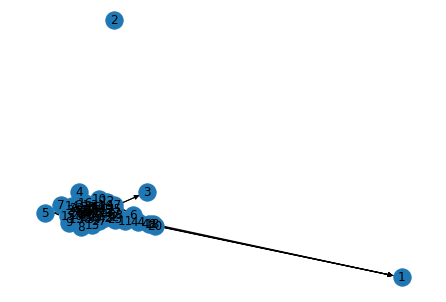

In [23]:
Gbk = nx.from_numpy_matrix(np.array(matrix_bkmeans), create_using=nx.MultiDiGraph())  
nx.draw(Gbk, with_labels=True) 

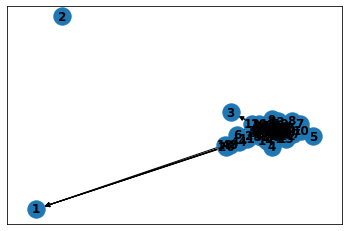

In [24]:
nx.draw_networkx(Gbk, with_labels=True, font_weight='bold', create_using=nx.MultiDiGraph())

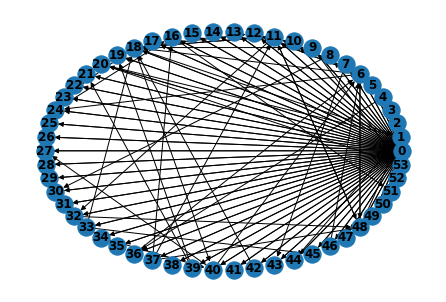

In [25]:
nx.draw_circular(Gbk, with_labels=True, font_weight='bold', create_using=nx.MultiDiGraph())

Random Layout:


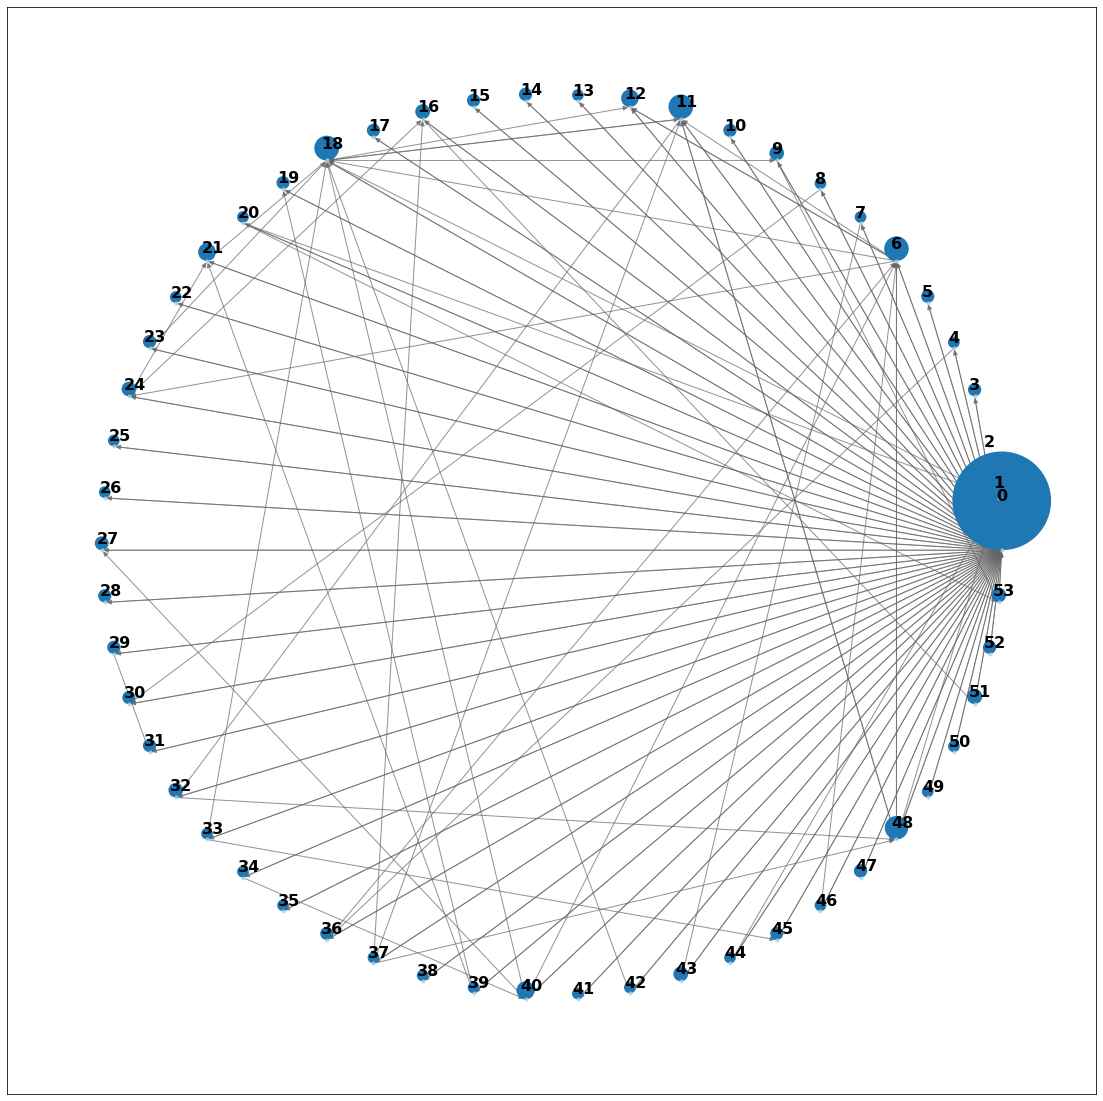

In [26]:
import matplotlib.pyplot as plt

node_color = [Gbk.degree(v) for v in Gbk]
node_size = [0.0005 * Gbk.degree(v) for v in Gbk]

# Calculate centrality
centrality = nx.eigenvector_centrality_numpy(Gbk)

'''edge_width = [0.0015 * G[u][v]['weight'] for u, v in G.edges()]'''

plt.figure(figsize=(20,20))
ax = plt.gca()
ax.set_aspect('equal')

pos = nx.circular_layout(Gbk)
print("Random Layout:")
  
# demonstrating random layout
nx.draw_networkx(Gbk, pos, node_size = 10, font_weight='bold',
                 node_color = 'lightblue', alpha = 0.7, 
                 with_labels = False,
                 edge_color ='.4', cmap = plt.cm.Blues)
  
for node, (x,y) in pos.items():
    rad = centrality[node]*0.16
    circle = plt.Circle((x,y+rad), radius=rad)
    plt.text(x-.012, y+rad, node, fontsize=16, weight="bold")
    ax.add_artist(circle)
    
plt.show()